In [59]:
import ee
import geemap

#ee.Authenticate()  # Only needed for the first time
ee.Initialize()
Map= geemap.Map()

In [60]:
lake = ee.FeatureCollection('projects/ee-mazard/assets/adk-samplelakes') \
    .filter(ee.Filter.eq('GNIS_Name', 'Big Moose Lake'))

In [61]:
#station = ee.Geometry.Point(-74.85423940003443,43.81880036802749)

In [62]:
station = ee.Geometry.Point(-74.86113631486039,43.82283062049295)

In [63]:
Map.addLayer(station)
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [64]:
Map.centerObject(station, 16)

In [65]:
def cdom(img):
    co = img.expression("(20.3 - 10. * (b2 / b3) - 2.4 * (b3 / b4))", {
        'b1': img.select('SR_B2'),
        'b2': img.select('SR_B3'),
        'b3': img.select('SR_B4'),
        'b4': img.select('SR_B5')
    }).rename("CO")
    return img.addBands([co])



In [66]:
collection_5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(9, 11, 'month')) \
    .filterBounds(lake) \
    .map(cdom)

def get_cdom_value_5(img):
    value = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).get('CO')
    return img.set('CDOM', value)
#LANDSAT/LT05/C02/T1_L2
# Map over the Image Collection to get CDOM values
cdom_collection_5 = collection_5.map(get_cdom_value_5)
cdom_values_5 = cdom_collection_5.aggregate_array('CDOM').getInfo()

In [67]:
# collection_51 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
#    .filter(ee.Filter.calendarRange(9, 11, 'month')) \
#    .filterBounds(station) \
#    .map(cdom5).filter(ee.Filter.calendarRange(2014, 2021, 'year'));
# #     
collection_51 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
   .filter(ee.Filter.calendarRange(9, 11, 'month')) \
   .filterBounds(station) \
   .map(cdom)

def get_cdom_value_51(img):
    value = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=station, scale=30).get('CO')
    return img.set('CDOM', value)

# # Map over the Image Collection to get CDOM values
cdom_collection_51 = collection_51.map(get_cdom_value_51)
cdom_values_51 = cdom_collection_51.aggregate_array('CDOM').getInfo()

In [68]:
#print(cdom_values_51)

In [69]:
import datetime

dates = cdom_collection_5.aggregate_array('system:time_start').getInfo()
dates = [datetime.datetime.fromtimestamp(d/1000) for d in dates]


In [70]:
import datetime

# Retrieve timestamps from Earth Engine and convert to datetime objects
dates_1 = cdom_collection_51.aggregate_array('system:time_start').getInfo()
dates_1 = [datetime.datetime.fromtimestamp(d / 1000) for d in dates_1]

#print(dates_1)
# common_dates = list(set(dates_1).intersection(dates))


In [71]:
size_date1 = len(dates_1)
print(size_date1)

size_cdomValues1 = len(cdom_values_5)
print(size_cdomValues1)

304
312


In [72]:
size_date = len(dates)
print(size_date)

size_cdomValues = len(cdom_values_5)
print(size_cdomValues)

312
312


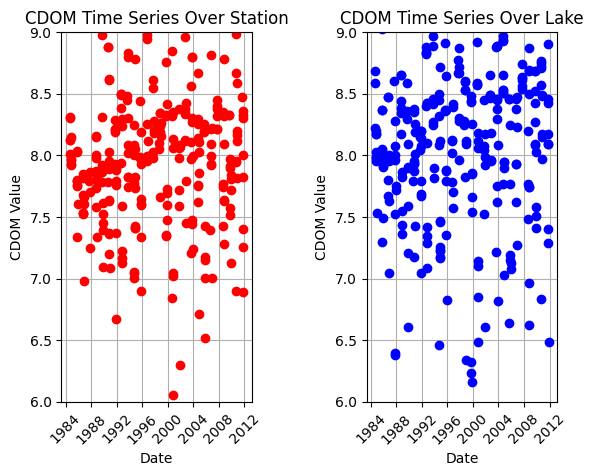

In [73]:
# Plot the time series
#Cdom value is Lake

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

plt.subplot(121)
plt.grid(True)
# cdom value 1 is Station
plt.plot_date(dates_1, cdom_values_51, 'ro')
# plt.plot_date(dates, cdom_values, 'b-', marker='o')
plt.xlabel('Date')
plt.ylabel('CDOM Value')
plt.ylim(6, 9)
plt.title('CDOM Time Series Over Station')
plt.xticks(rotation=45)
plt.grid(True)
plt.subplots_adjust(wspace=0.6)

plt.subplot(122)
#plt.figure(figsize=(10, 6))
plt.plot_date(dates, cdom_values_5, 'bo')
plt.xlabel('Date')
plt.ylabel('CDOM Value')
plt.title('CDOM Time Series Over Lake')
plt.grid(True)
plt.ylim(6, 9)
plt.xticks(rotation=45)
plt.show()


In [74]:
def maskL8sr(image):

  qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
  saturationMask = image.select('QA_RADSAT').eq(0)

  opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
  thermalBands = image.select('ST_B.*').multiply(0.00341802).add(-124.15)


  return image.addBands(opticalBands, None, True) \
      .addBands(thermalBands, None, True) \
      .updateMask(qaMask) \
      .updateMask(saturationMask)

In [76]:
collection =ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(9, 11, 'month')) \
    .filterBounds(lake) \
    .map(cdom)

collection1 = ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
    .filter(ee.Filter.calendarRange(9, 11, 'month')) \
    .filterBounds(station) \
    .map(cdom)
    #\
    #.map(maskL8sr)


In [77]:
def get_cdom_value1(img):
    value = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake, scale=30).get('CO')
    return img.set('CDOM', value)

# Map over the Image Collection to get CDOM values
cdom_collection1 = collection.map(get_cdom_value1)


In [78]:
cdom_values1 = cdom_collection1.aggregate_array('CDOM').getInfo()

In [79]:
def get_cdom_value(img):
    value = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=station, scale=30).get('CO')
    return img.set('CDOM', value)

# Map over the Image Collection to get CDOM values
cdom_collection = collection1.map(get_cdom_value)

In [80]:
cdom_values = cdom_collection.aggregate_array('CDOM').getInfo()
#print(cdom_values)


In [81]:
dates = cdom_collection.aggregate_array('system:time_start').getInfo()

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

# Convert the dates to datetime objects
dates = [datetime.datetime.fromtimestamp(d/1000) for d in dates]

#print(dates)


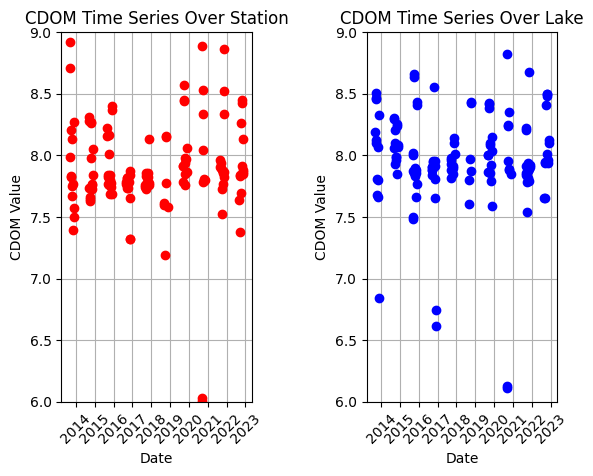

In [83]:
# Plot the time series
#Cdom value is station
plt.subplot(121)
#plt.figure(figsize=(10, 6))
plt.plot_date(dates, cdom_values, 'ro')
plt.xlabel('Date')
plt.ylabel('CDOM Value')
plt.title('CDOM Time Series Over Station')
plt.grid(True)
plt.ylim(6, 9)
plt.xticks(rotation=45)

plt.subplot(122)
plt.grid(True)
#cdom value 1 is lake
plt.plot_date(dates, cdom_values1, 'bo')
#plt.plot_date(dates, cdom_values, 'b-', marker='o')
plt.xlabel('Date')
plt.ylabel('CDOM Value')
plt.ylim(6, 9)
plt.title('CDOM Time Series Over Lake')
plt.xticks(rotation=45)
plt.grid(True)
plt.subplots_adjust(wspace=0.6)
plt.show()